In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
file_path = 'plan_du_métro.csv'  # Remplacez par le chemin de votre fichier
df = pd.read_csv(file_path)

# Vérifier les données
print(df.head())

  de Ligne                   de Station vers Ligne  \
0        1   Charles de Gaulle - Étoile          2   
1        1   Charles de Gaulle - Étoile          6   
2        1        Franklin D. Roosevelt          9   
3        1  Champs-Élysées - Clemenceau         13   
4        1                     Concorde          8   

                  vers Station  
0   Charles de Gaulle - Étoile  
1   Charles de Gaulle - Étoile  
2        Franklin D. Roosevelt  
3  Champs-Élysées - Clemenceau  
4                     Concorde  


In [ ]:
# Extraire les stations et les connexions
stations = pd.concat([df['de Station'], df['vers Station']]).unique()

(307,)


In [18]:
# Créer le graphe avec NetworkX
G = nx.Graph()
G.add_nodes_from(stations) 

edges = df[['de Station', 'vers Station']].drop_duplicates()

In [19]:
# Étape 4 : Ajouter les arêtes au graphe
for _, row in edges.iterrows():
    # Vérifier si l'arête existe déjà (sans direction)
    if not G.has_edge(row['de Station'], row['vers Station']):
        G.add_edge(row['de Station'], row['vers Station'])


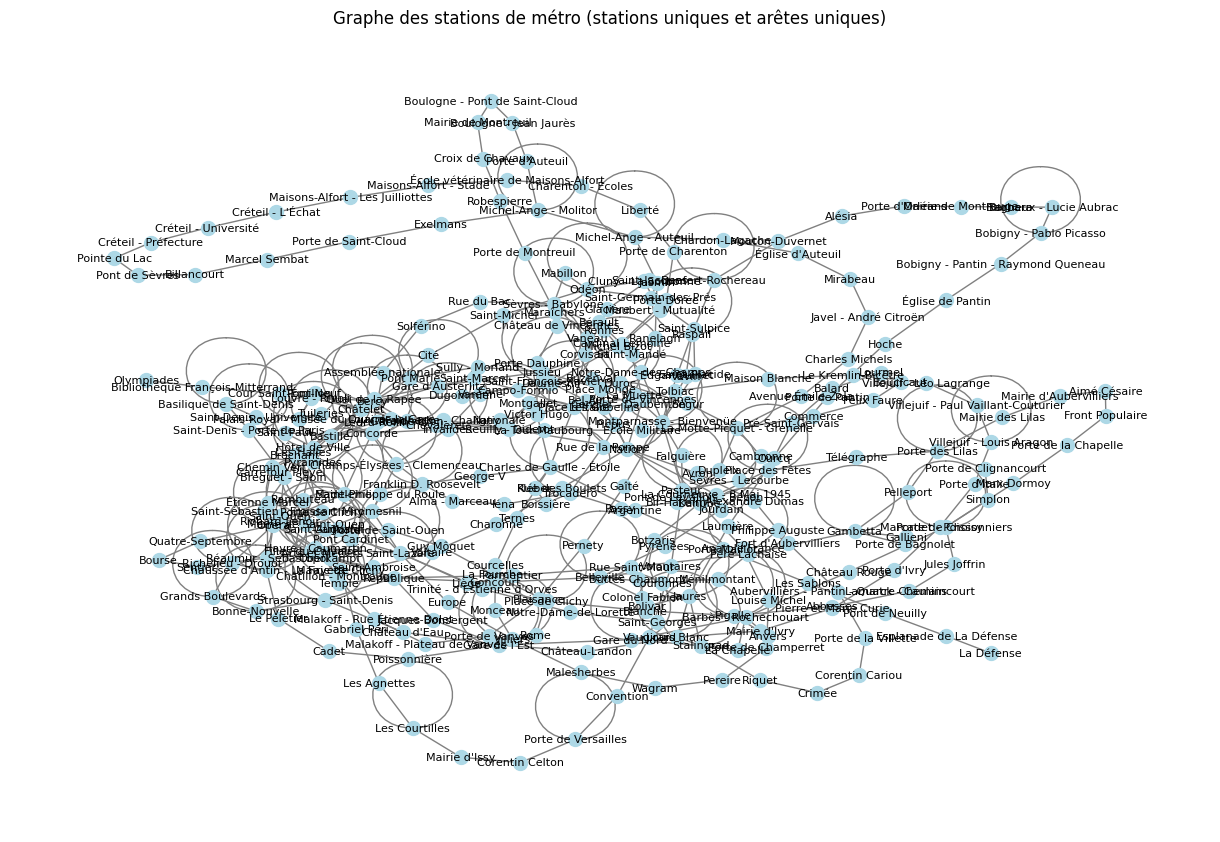

In [20]:

# Visualiser le graphe
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Générer une disposition pour les nœuds
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=100,
    font_size=8,
    node_color='lightblue',
    edge_color='gray'
)
plt.title("Graphe des stations de métro (stations uniques et arêtes uniques)")
plt.show()